In [ ]:
##@Author: Gemma Gordon
##@Date: August 2022
## Compare the concavity of the epitopes of Abs and sdAbs and verify the mesh representation of the crystal structures 

analyse results from vertex defects analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.dpi'] = 1200

In [3]:
sdabs_df = pd.read_csv('Nbs_VD_results_final.csv')
flabs_df = pd.read_csv('Abs_VD_results_final_under1A.csv')

In [3]:
sdabs_df['mean_VD'].describe()

count    345.000000
mean      -1.955946
std        0.604784
min       -3.785527
25%       -2.325005
50%       -1.909592
75%       -1.595961
max       -0.237301
Name: mean_VD, dtype: float64

In [4]:
flabs_df['mean_VD'].describe()

count    890.000000
mean      -1.886372
std        0.619483
min       -5.106457
25%       -2.234721
50%       -1.872423
75%       -1.494314
max        0.147101
Name: mean_VD, dtype: float64

compare distributions of mean VD values

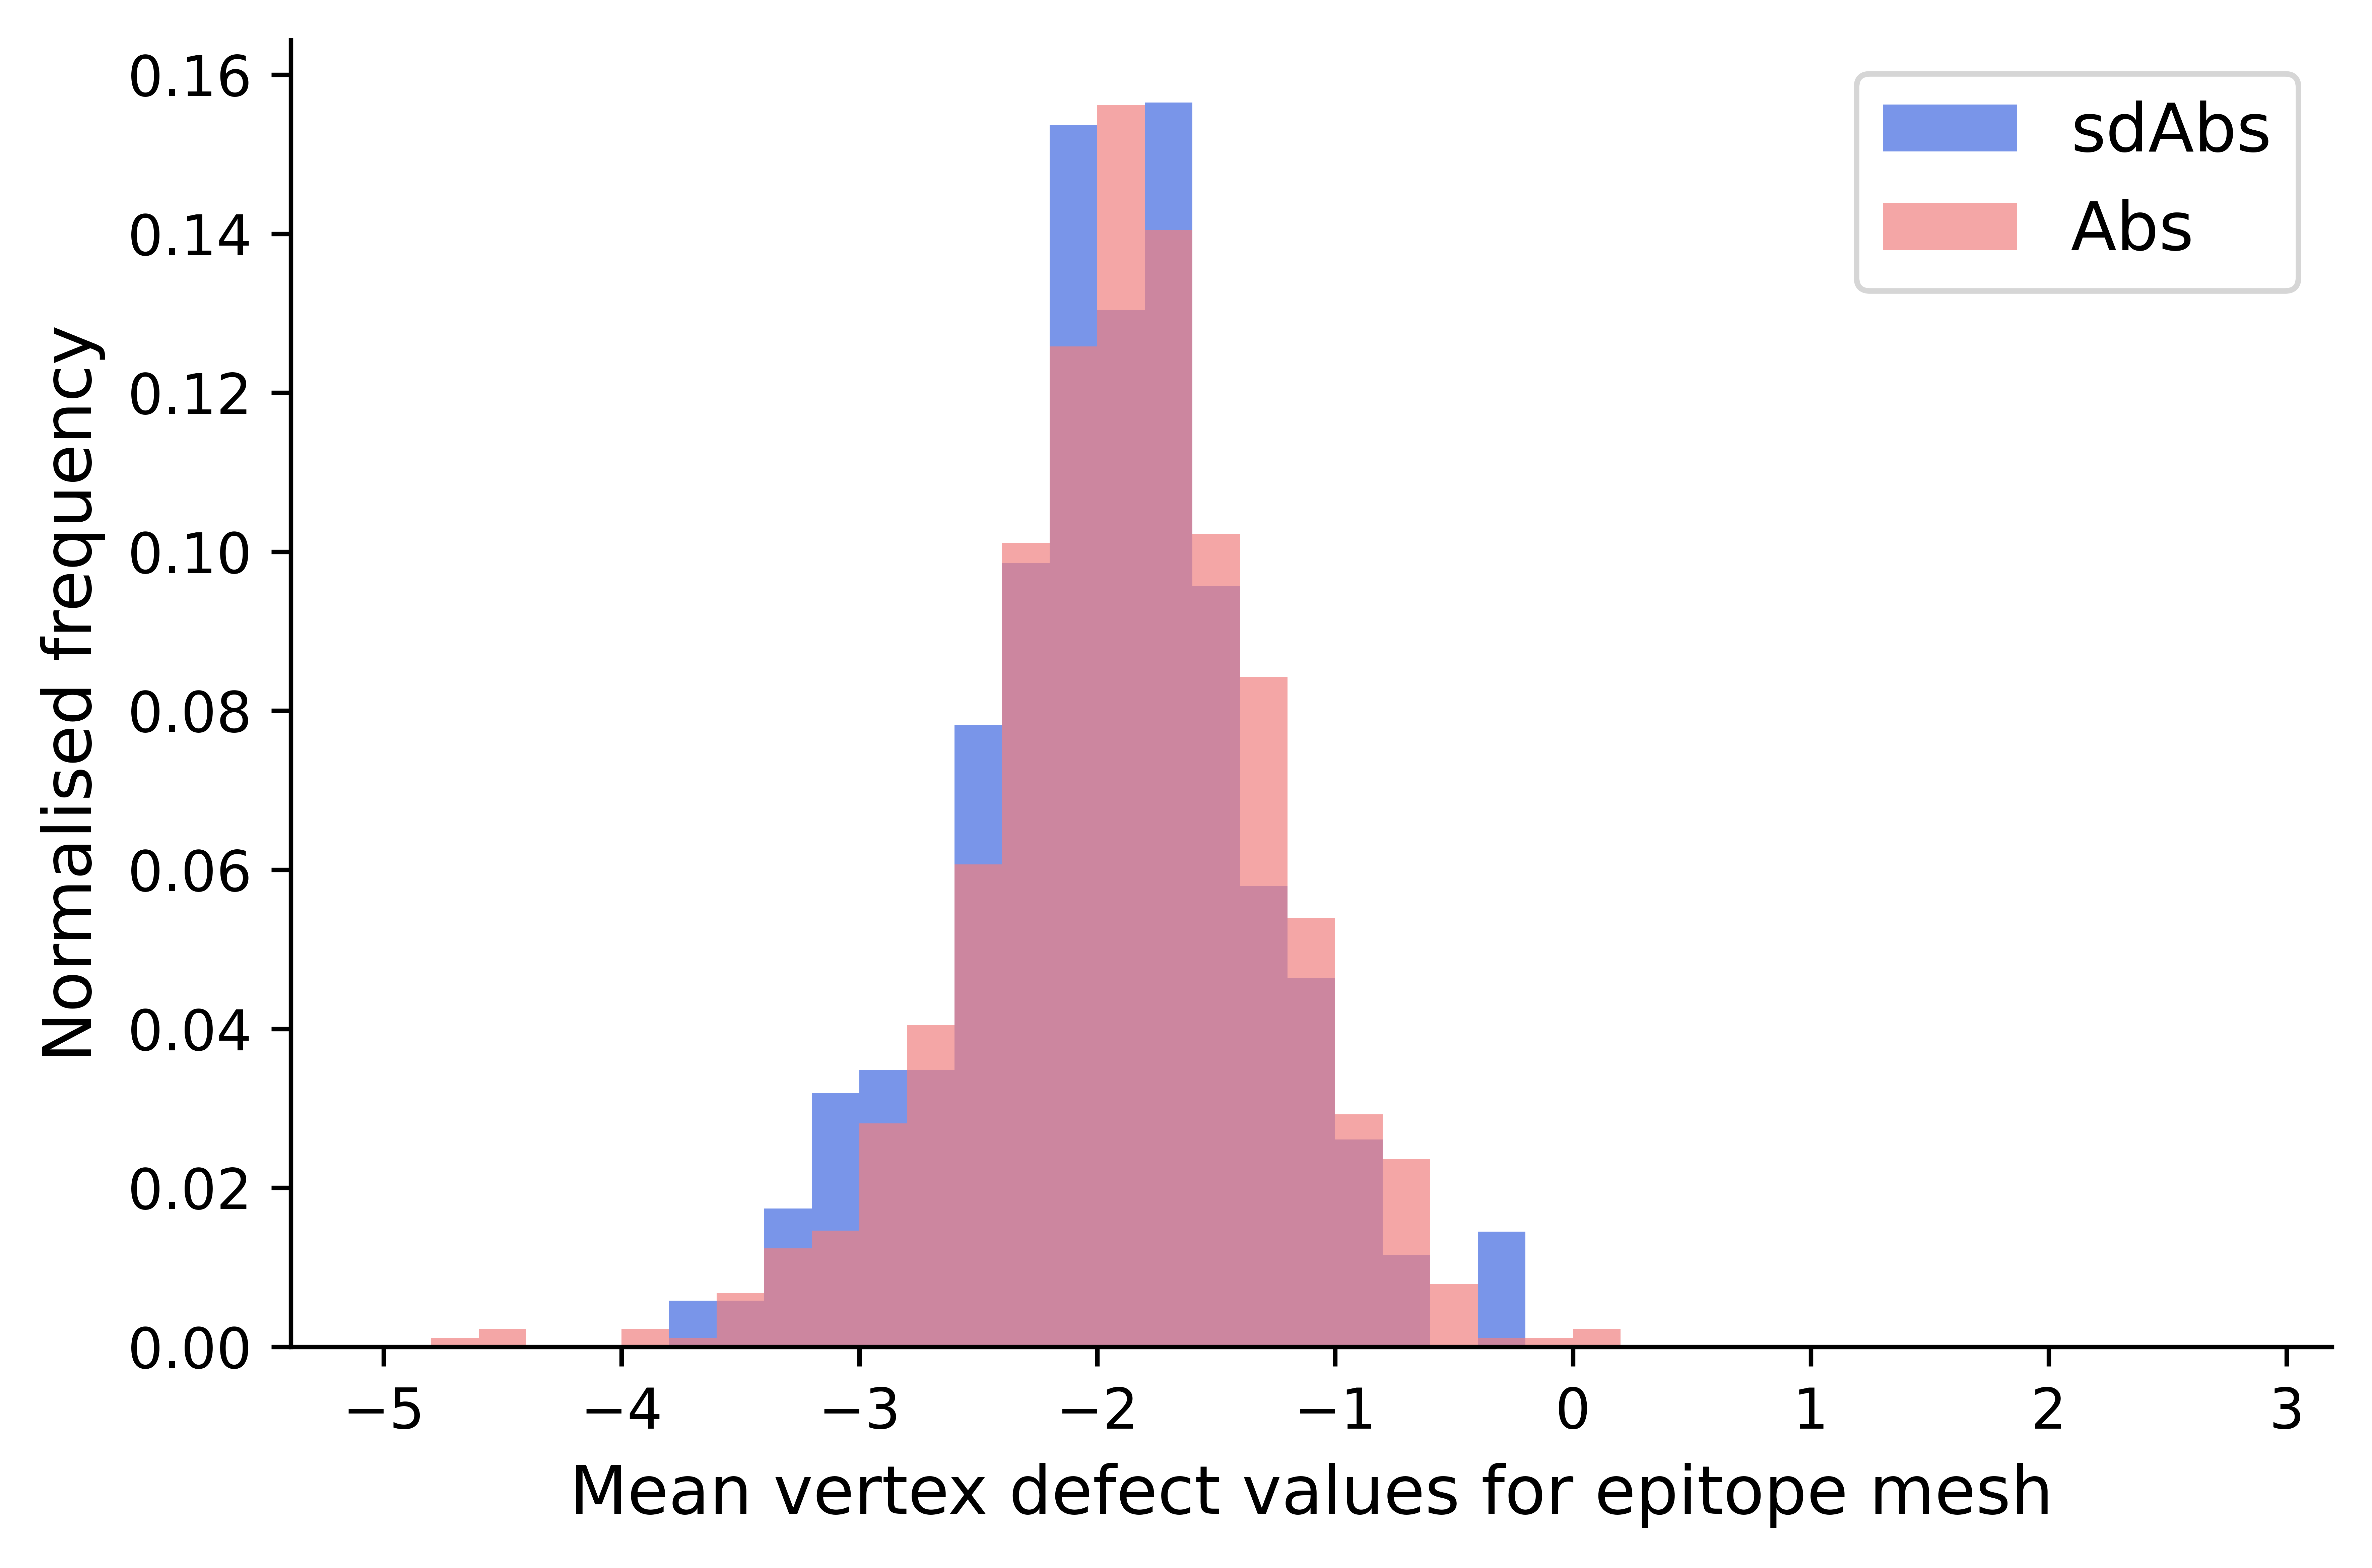

In [4]:
bins = np.arange(-5, 3, 0.2)

plt.figure()
plt.hist(sdabs_df['mean_VD'], bins=bins, label='sdAbs', alpha=0.7, color='royalblue', weights=np.zeros_like(sdabs_df['mean_VD']) + 1. / len(sdabs_df['mean_VD']))
plt.hist(flabs_df['mean_VD'], bins=bins, label='Abs', alpha=0.7, color='lightcoral', weights=np.zeros_like(flabs_df['mean_VD']) + 1. / len(flabs_df['mean_VD']))
plt.xlabel('Mean vertex defect values for epitope mesh', fontsize=12)
plt.ylabel('Normalised frequency', fontsize=12)
plt.legend(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [8]:
from scipy import stats

In [7]:
stats.mannwhitneyu(sdabs_df['mean_VD'], flabs_df['mean_VD'])

MannwhitneyuResult(statistic=142392.0, pvalue=0.02387627193115712)

In [9]:
import ast

In [10]:
nbs_positive = []
nbs_negative = []
for row in sdabs_df['positive vs negative']:
    row = ast.literal_eval(row)
    positive, negative = list(row.values())
    nbs_positive.append(positive)
    nbs_negative.append(negative)


In [11]:
abs_positive = []
abs_negative = []
for row in flabs_df['positive vs negative']:
    row = ast.literal_eval(row)
    positive, negative = list(row.values())
    abs_positive.append(positive)
    abs_negative.append(negative)

In [11]:
pd.Series(nbs_positive).describe()

count    345.000000
mean       0.284812
std        0.073997
min        0.113636
25%        0.241071
50%        0.275000
75%        0.318182
max        0.545455
dtype: float64

In [12]:
pd.Series(nbs_negative).describe()

count    345.000000
mean       0.715188
std        0.073997
min        0.454545
25%        0.681818
50%        0.725000
75%        0.758929
max        0.886364
dtype: float64

In [13]:
pd.Series(abs_positive).describe()

count    890.000000
mean       0.293935
std        0.073774
min        0.000000
25%        0.247226
50%        0.289488
75%        0.336246
max        0.555556
dtype: float64

In [14]:
pd.Series(abs_negative).describe()

count    890.000000
mean       0.706065
std        0.073774
min        0.444444
25%        0.663754
50%        0.710512
75%        0.752774
max        1.000000
dtype: float64

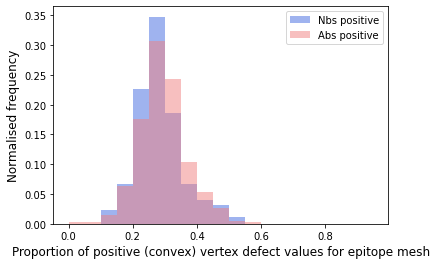

In [15]:
bins = np.arange(0,1,0.05)
plt.figure()
plt.hist(nbs_positive, bins=bins, label='Nbs positive', alpha=0.5, color='royalblue', weights=np.zeros_like(nbs_positive) + 1. / len(nbs_positive))
plt.hist(abs_positive, bins=bins, label='Abs positive', alpha=0.5, color='lightcoral', weights=np.zeros_like(abs_positive) + 1. / len(abs_positive))
plt.xlabel('Proportion of positive (convex) vertex defect values for epitope mesh', fontsize=12)
plt.ylabel('Normalised frequency', fontsize=12)
plt.legend(fontsize=12)
plt.legend()
plt.show()

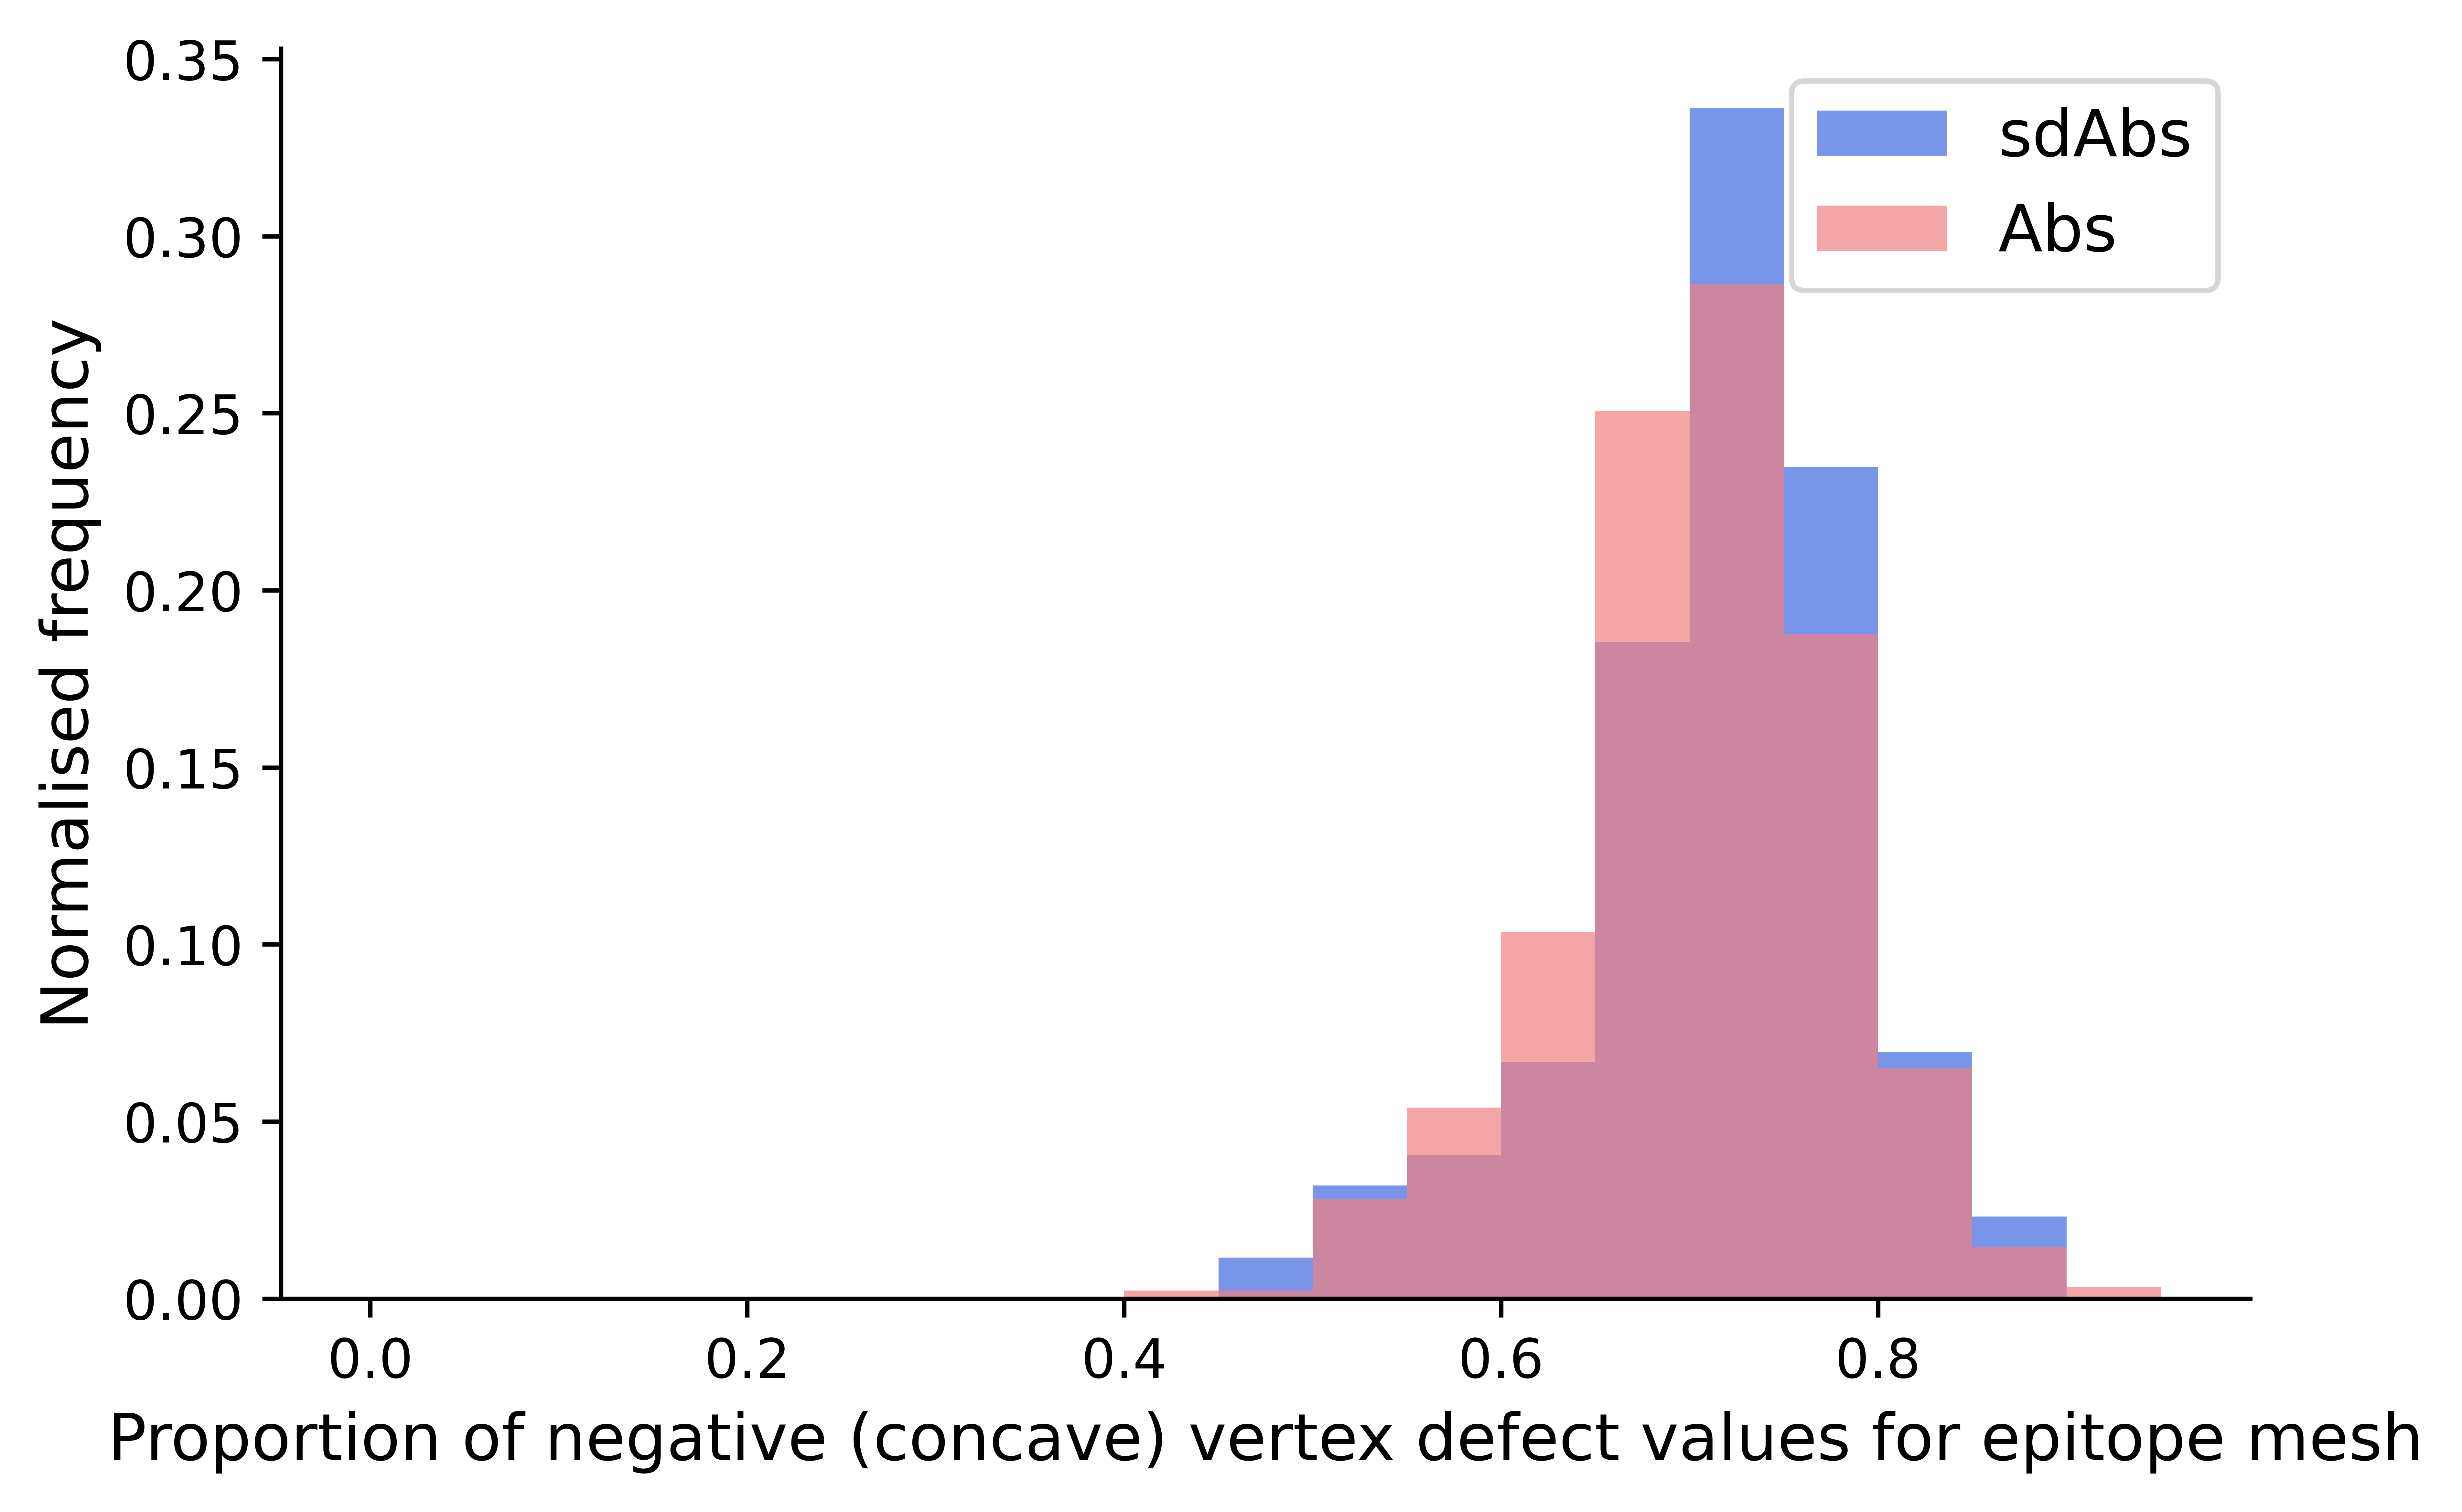

In [12]:
bins = np.arange(0,1,0.05)
plt.figure()
plt.hist(nbs_negative, bins=bins, label='sdAbs', alpha=0.7, color='royalblue', weights=np.zeros_like(nbs_negative) + 1. / len(nbs_negative))
plt.hist(abs_negative, bins=bins, label='Abs', alpha=0.7, color='lightcoral', weights=np.zeros_like(abs_negative) + 1. / len(abs_negative))
plt.xlabel('Proportion of negative (concave) vertex defect values for epitope mesh', fontsize=12)
plt.ylabel('Normalised frequency', fontsize=12)
plt.legend(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [17]:
stats.mannwhitneyu(nbs_positive, abs_positive)

MannwhitneyuResult(statistic=137133.5, pvalue=0.0017805247168161127)

In [18]:
stats.mannwhitneyu(nbs_negative, abs_negative)

MannwhitneyuResult(statistic=137133.5, pvalue=0.0017805247168161127)

## Bootstrapping results

In [19]:
import dabest
from statsmodels.stats.weightstats import ztest as ztest

In [20]:
def perform_bootstrap(n_sample, interaction_sizes):
    df = pd.DataFrame([np.random.choice(interaction_sizes[k],n_sample,replace=False) for k in interaction_sizes]).T
    df.columns = [k for k in interaction_sizes]
    x = dabest.load(df, idx=(list(interaction_sizes.keys())[0],list(interaction_sizes.keys())[1]))
    print(x.mean_diff)

In [21]:
zoutput_meanvd = ztest(sdabs_df['mean_VD'], flabs_df['mean_VD'], value=0) 
print(f"ztest continuity percentage: {zoutput_meanvd}")

ztest continuity percentage: (-1.782574518279713, 0.07465559088973256)


In [22]:
dict_lengths_meanvd = {'Nbs': sdabs_df['mean_VD'],
                     'Abs': flabs_df['mean_VD'] }
perform_bootstrap(300, dict_lengths_meanvd)

DABEST v0.3.1
             
Good morning!
The current time is Mon Mar 13 10:21:28 2023.

The unpaired mean difference between Nbs and Abs is 0.085 [95%CI -0.0145, 0.183].
The p-value of the two-sided permutation t-test is 0.0984. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


In [23]:
zoutput_proportion = ztest(nbs_negative, abs_negative, value=0) 
print(f"ztest continuity percentage: {zoutput_proportion}")

ztest continuity percentage: (1.9481792395480595, 0.05139352000198679)


In [24]:
dict_lengths_proportion = {'Nbs': nbs_negative,
                     'Abs': abs_negative }
perform_bootstrap(300, dict_lengths_proportion)

DABEST v0.3.1
             
Good morning!
The current time is Mon Mar 13 10:21:31 2023.

The unpaired mean difference between Nbs and Abs is -0.0162 [95%CI -0.0279, -0.00324].
The p-value of the two-sided permutation t-test is 0.009. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


check distribution of RMSD values

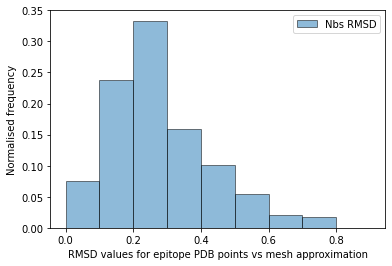

In [25]:
bins = np.arange(0,1,0.1)
plt.figure()
plt.hist(sdabs_df['RMSD (PDB vs mesh)'], bins=bins, label='Nbs RMSD', alpha=0.5, edgecolor='black', weights=np.zeros_like(sdabs_df['RMSD (PDB vs mesh)']) + 1. / len(sdabs_df['RMSD (PDB vs mesh)']))
plt.xlabel('RMSD values for epitope PDB points vs mesh approximation')
plt.ylabel('Normalised frequency')
plt.legend()
plt.legend()
plt.show()

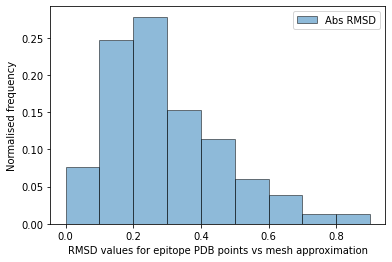

In [26]:
bins = np.arange(0,1,0.1)
plt.figure()
plt.hist(flabs_df['RMSD (PDB vs mesh)'], bins=bins, label='Abs RMSD', alpha=0.5, edgecolor='black', weights=np.zeros_like(flabs_df['RMSD (PDB vs mesh)']) + 1. / len(flabs_df['RMSD (PDB vs mesh)']))
plt.xlabel('RMSD values for epitope PDB points vs mesh approximation')
plt.ylabel('Normalised frequency')
plt.legend()
plt.legend()
plt.show()

is there a correlation between RMSD and convexity? ie are alpha shapes fitting right

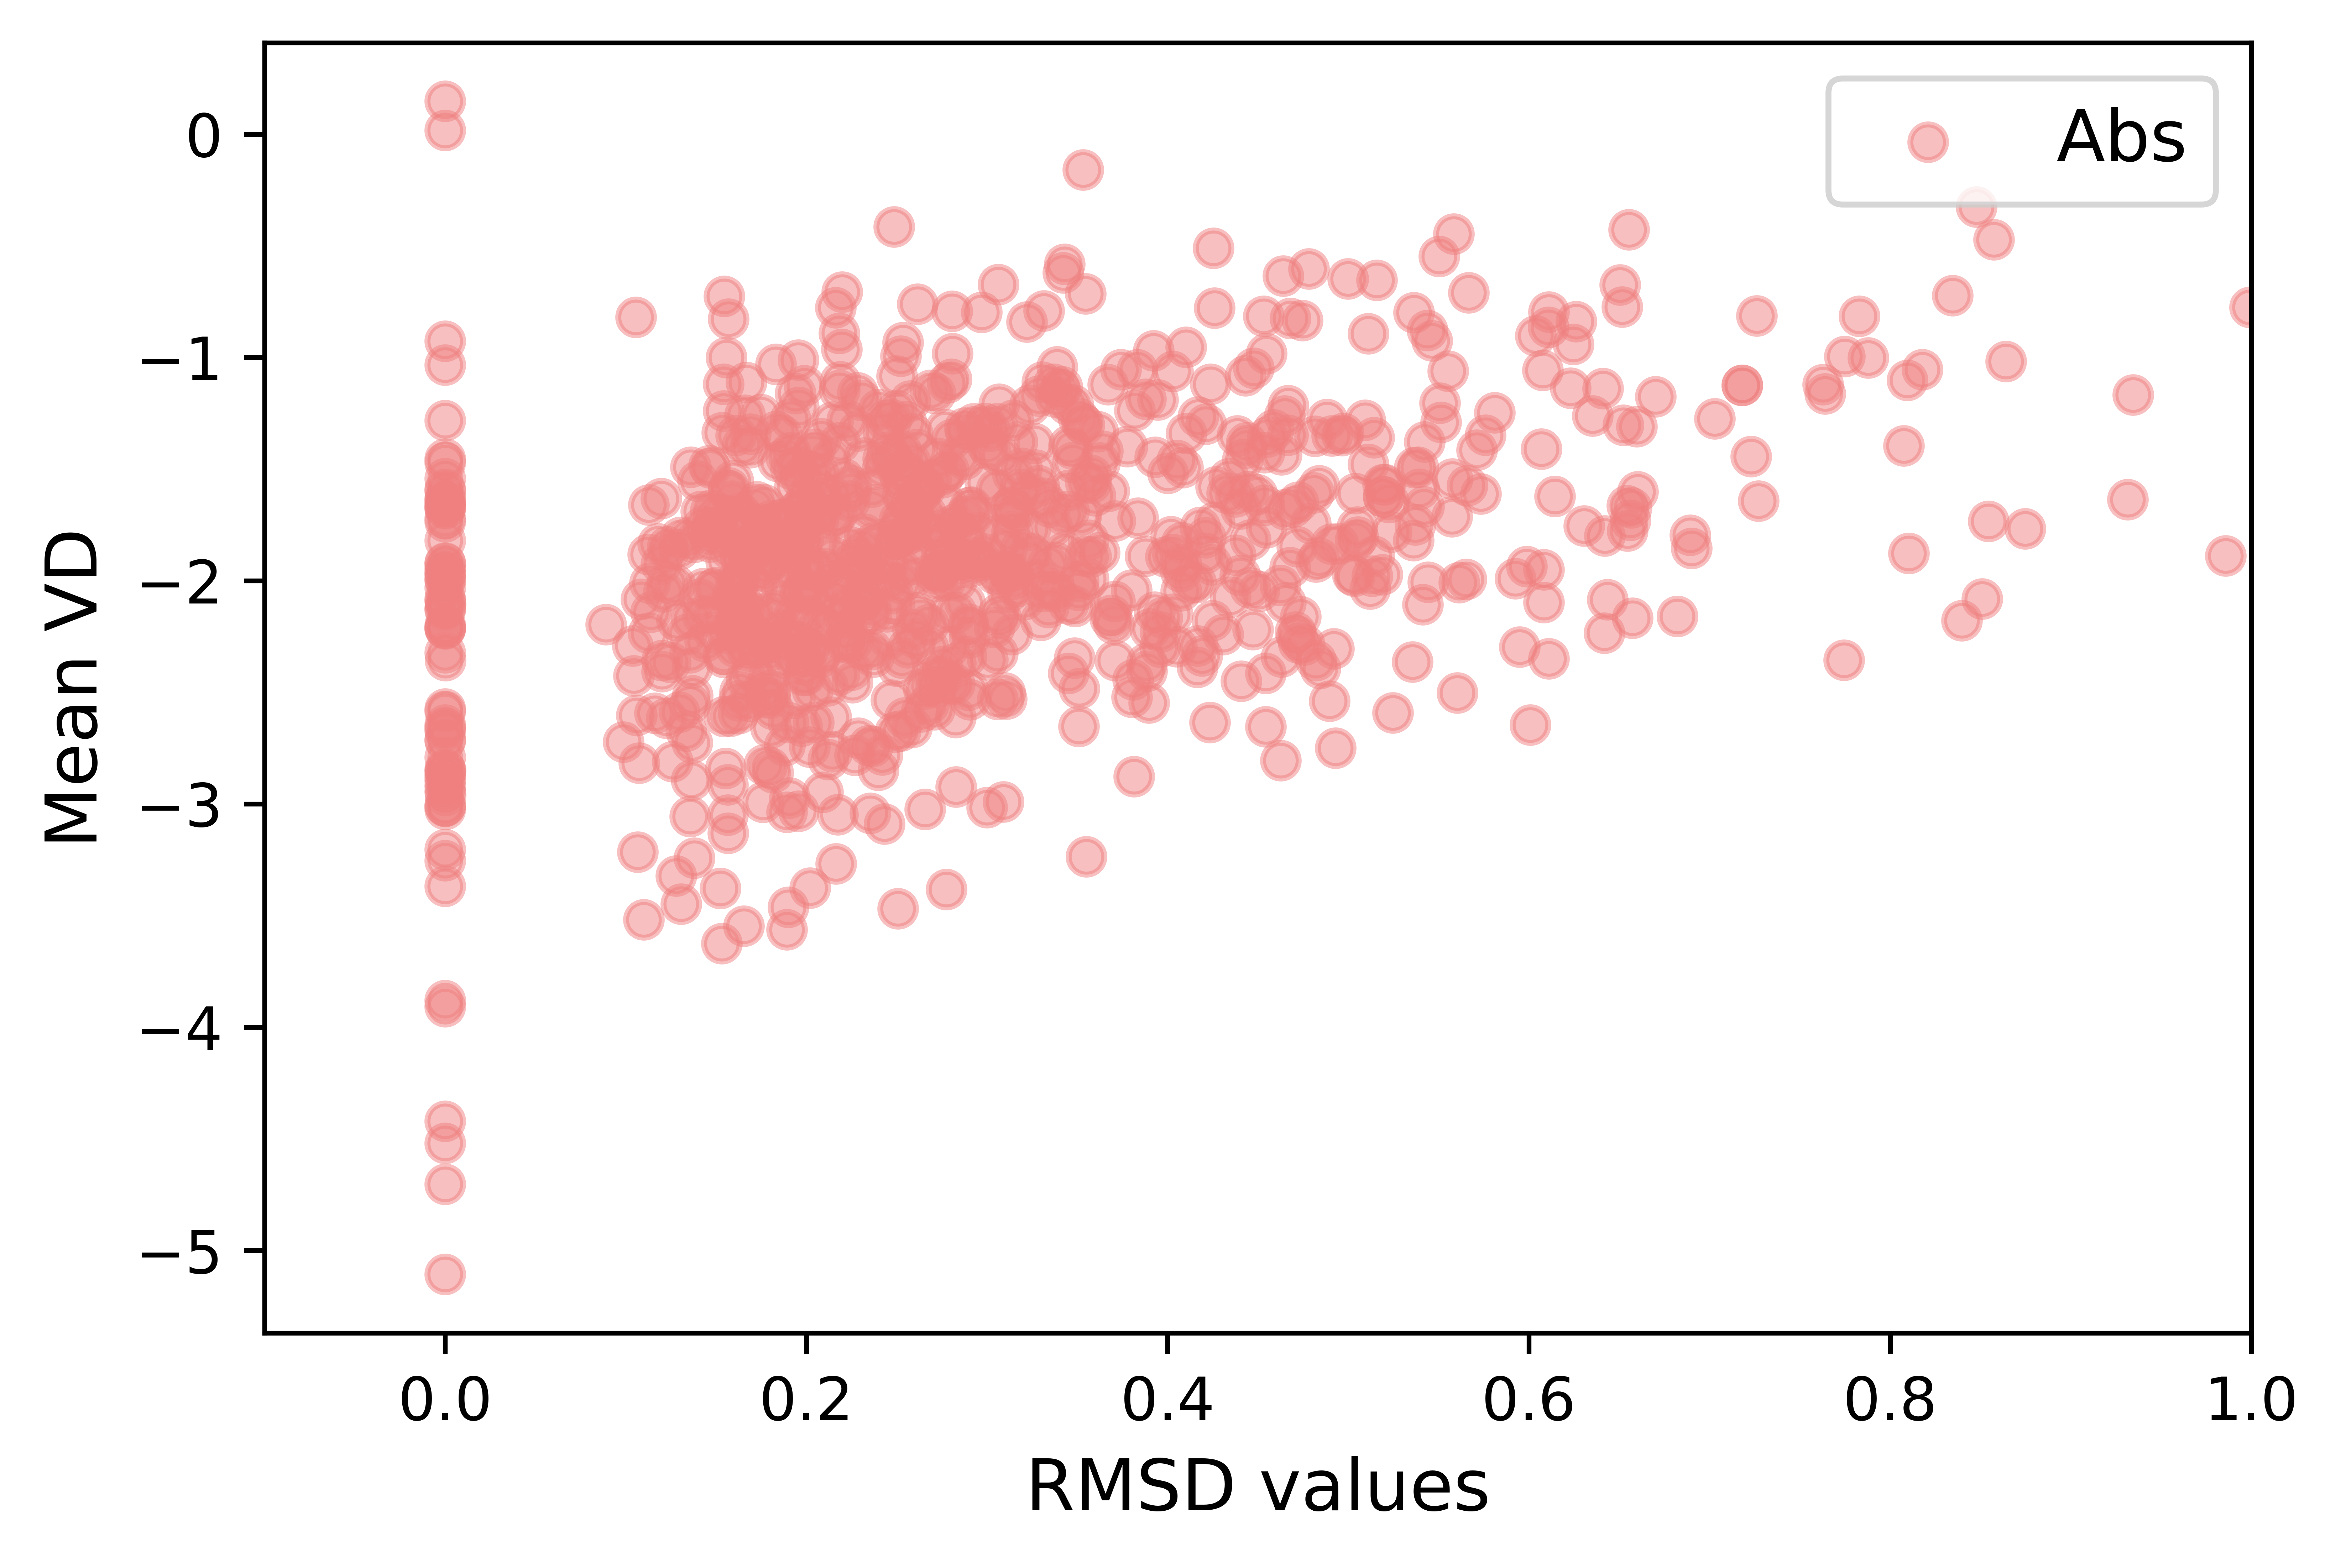

In [5]:
plt.figure()
plt.scatter(flabs_df['RMSD (PDB vs mesh)'], flabs_df['mean_VD'], label='Abs', color='lightcoral', alpha=0.5)
plt.xlabel('RMSD values', fontsize=12)
plt.ylabel('Mean VD', fontsize=12)
plt.xlim(-0.1,1,0.1)
plt.legend(fontsize=12)
plt.show()

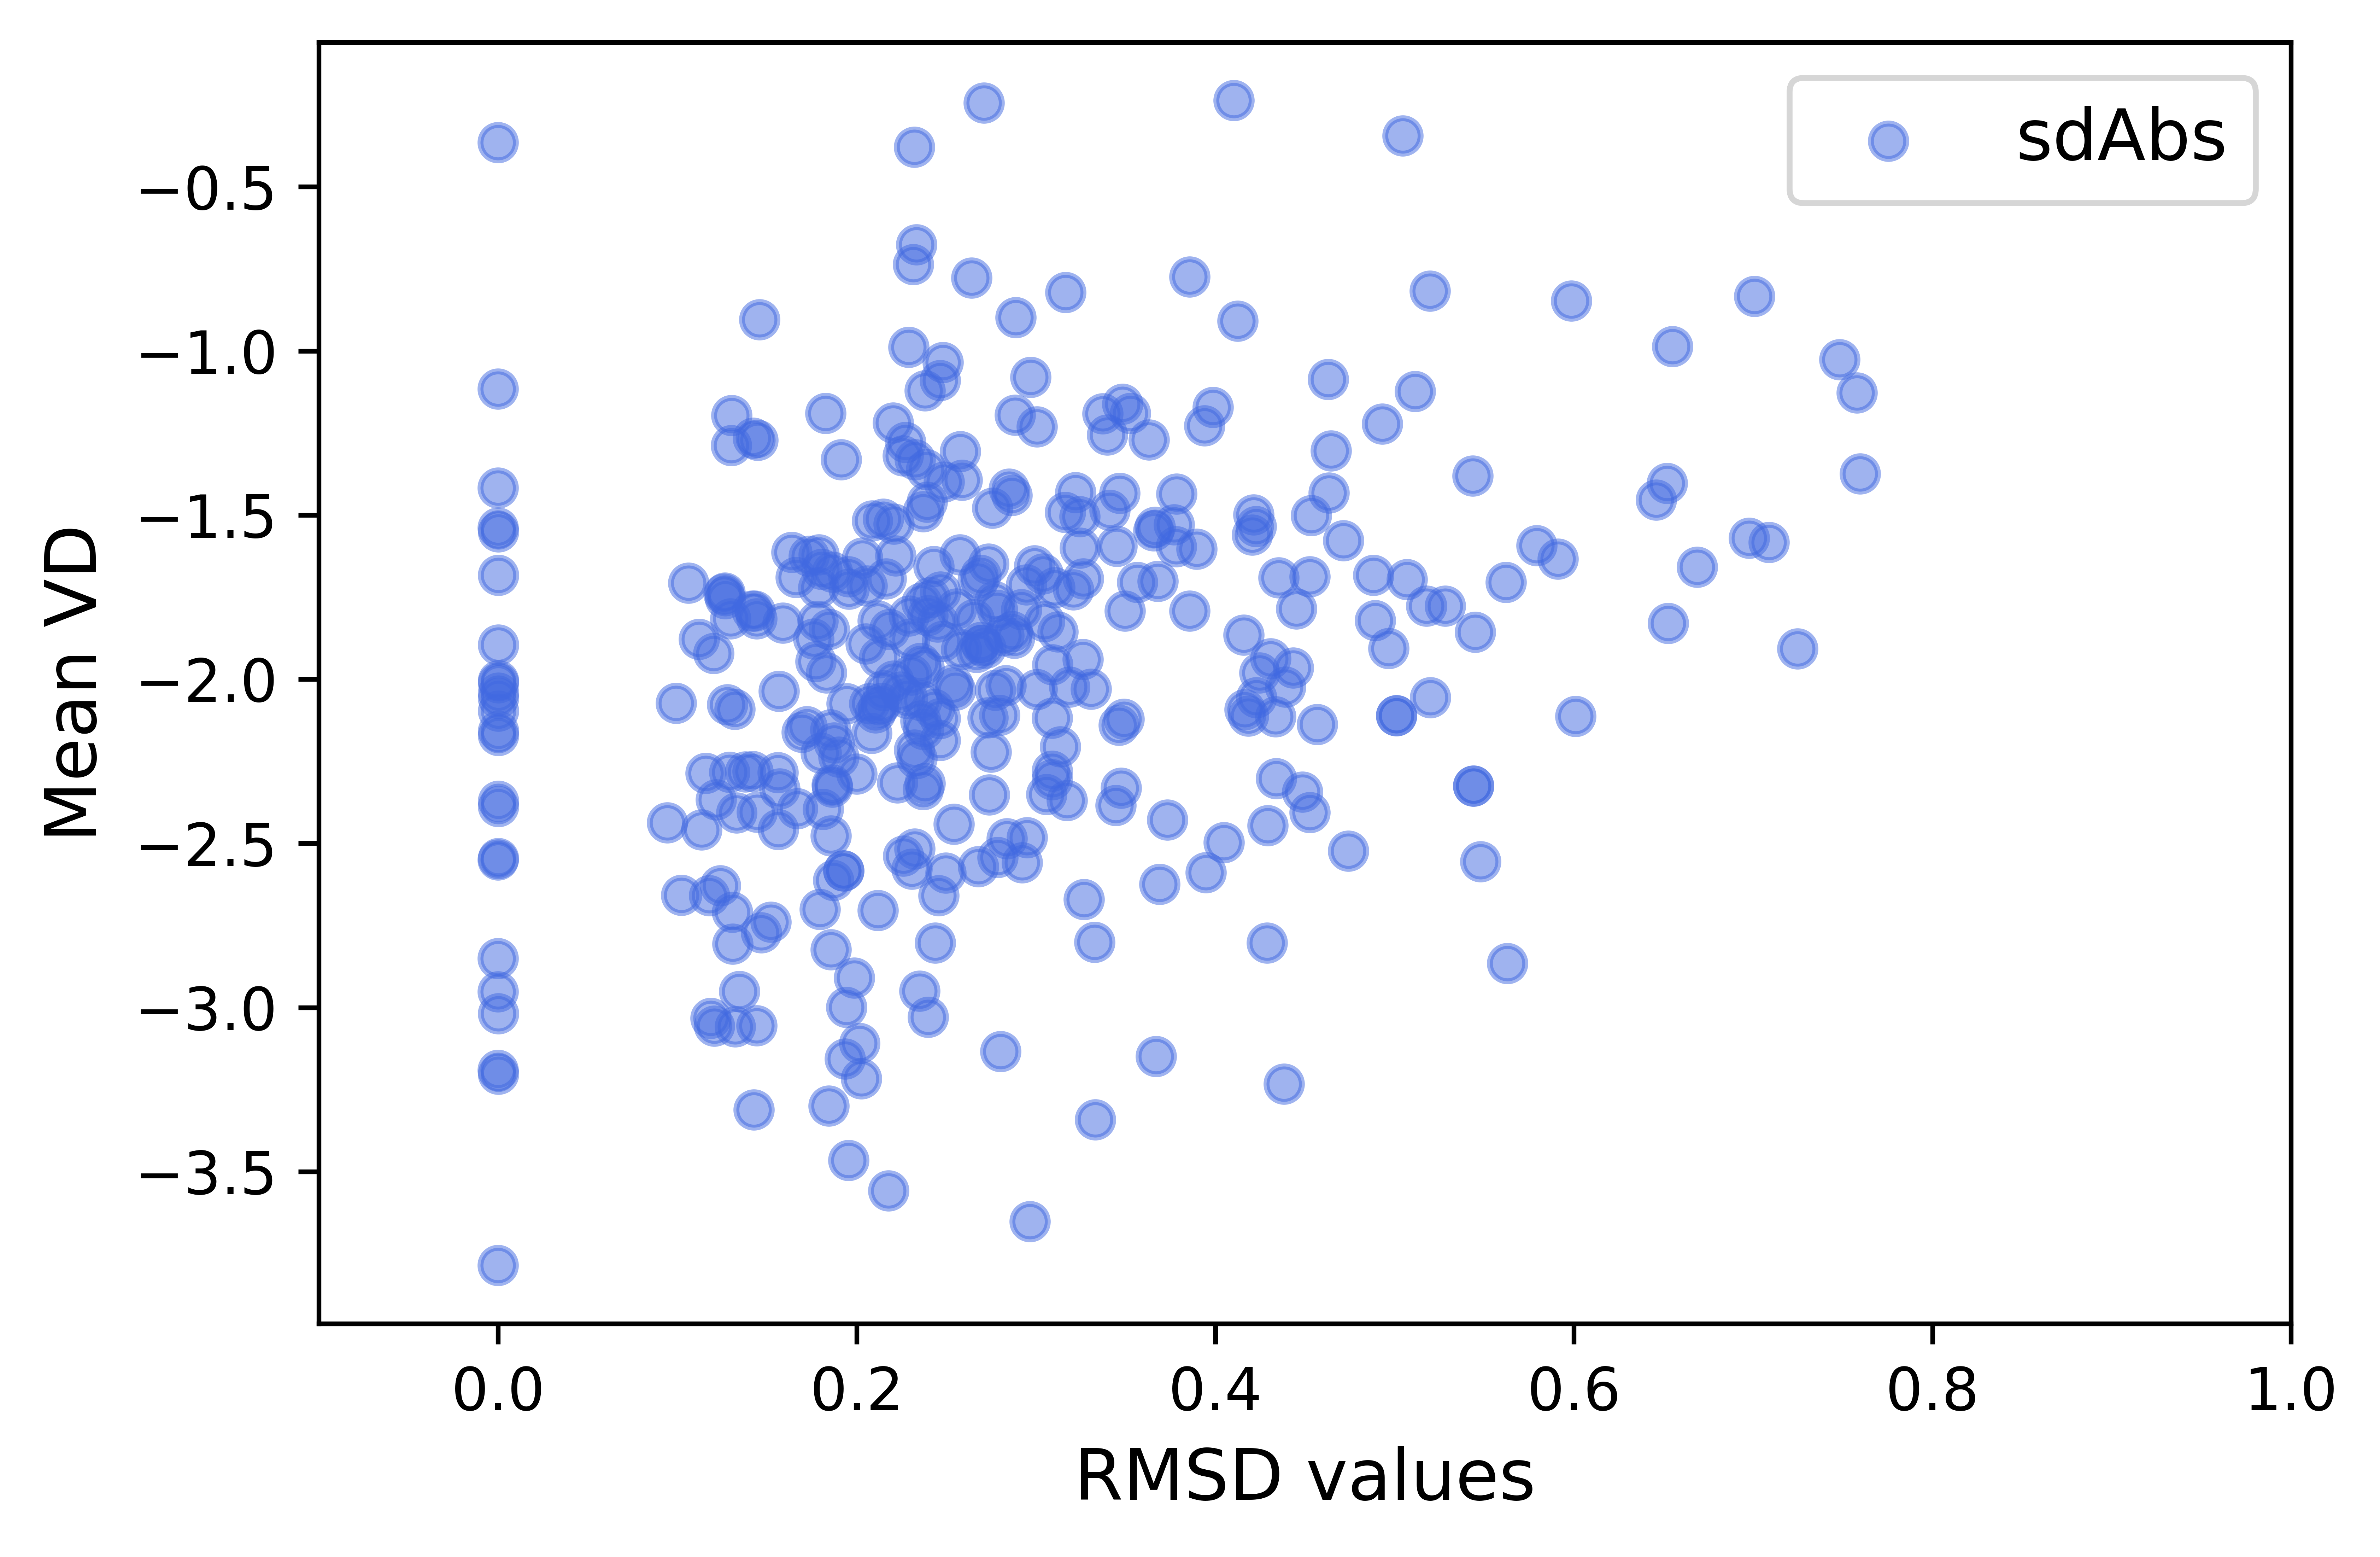

In [6]:
plt.figure()
plt.scatter(sdabs_df['RMSD (PDB vs mesh)'], sdabs_df['mean_VD'], label='sdAbs', color='royalblue', alpha=0.5)
plt.xlabel('RMSD values',fontsize=12)
plt.ylabel('Mean VD', fontsize=12)
plt.xlim(-0.1,1,0.1)
plt.legend(fontsize=12)
plt.show()

get structures for making pymol figures

In [29]:
sdabs_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'pdb', 'all_epitope_vd_values',
       'mean_VD', 'RMSD (PDB vs mesh)', 'positive vs negative', 'alpha'],
      dtype='object')

In [30]:
print(sdabs_df['pdb'].loc[sdabs_df['mean_VD'] == np.max(sdabs_df['mean_VD'])])
print(sdabs_df['pdb'].loc[sdabs_df['mean_VD'] == np.min(sdabs_df['mean_VD'])])

127    5e7f
Name: pdb, dtype: object
337    5o05
Name: pdb, dtype: object


In [31]:
print(flabs_df['pdb'].loc[flabs_df['mean_VD'] == np.max(flabs_df['mean_VD'])])
print(flabs_df['pdb'].loc[flabs_df['mean_VD'] == np.min(flabs_df['mean_VD'])])

355    7sem
Name: pdb, dtype: object
388    6azz
Name: pdb, dtype: object


generate pymol cmd

In [32]:
abs_dataset = pd.read_csv('/Users/gemmagordon/Documents/OXFORD/ROTATION 2/nbs_vs_abs/gg_flabs_summary_epitopes.csv')

In [33]:
abs_dataset['epitope_arp_res_nums_VHVL'].loc[abs_dataset['pdb'] == '2q8a'].iloc[0]

"dict_keys(['190', '225', '222', '204', '202', '223', '201', '205', '186', '224', '200', '188', '193', '197', '203', '196', '199', '189'])"

In [34]:
for residue in ['190', '225', '222', '204', '202', '223', '201', '205', '186', '224', '200', '188', '193', '197', '203', '196', '199', '189']: 
        print('color red, (resi ', residue.rstrip(), 'and chain A)\nshow spheres, (resi ', residue.rstrip(), 'and name CA and chain A)')

color red, (resi  190 and chain A)
show spheres, (resi  190 and name CA and chain A)
color red, (resi  225 and chain A)
show spheres, (resi  225 and name CA and chain A)
color red, (resi  222 and chain A)
show spheres, (resi  222 and name CA and chain A)
color red, (resi  204 and chain A)
show spheres, (resi  204 and name CA and chain A)
color red, (resi  202 and chain A)
show spheres, (resi  202 and name CA and chain A)
color red, (resi  223 and chain A)
show spheres, (resi  223 and name CA and chain A)
color red, (resi  201 and chain A)
show spheres, (resi  201 and name CA and chain A)
color red, (resi  205 and chain A)
show spheres, (resi  205 and name CA and chain A)
color red, (resi  186 and chain A)
show spheres, (resi  186 and name CA and chain A)
color red, (resi  224 and chain A)
show spheres, (resi  224 and name CA and chain A)
color red, (resi  200 and chain A)
show spheres, (resi  200 and name CA and chain A)
color red, (resi  188 and chain A)
show spheres, (resi  188 and n

In [35]:
sdabs_df.loc[sdabs_df['pdb'] == '3zkx']

Unnamed: 0  Unnamed: 0.1  index   pdb  \
154         154         155.0  155.0  3zkx   

                                 all_epitope_vd_values  mean_VD  \
154  [ -0.78626224  -0.41780265   0.45935982  -7.87... -2.95028   

     RMSD (PDB vs mesh)                               positive vs negative  \
154            0.235022  {'positive VD %': 0.22608695652173913, 'negati...   

     alpha  
154    2.3